## Preprocessing

In [31]:
import pandas as pd
import numpy as np
import numpy.random as nr
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("AW_AveMonthSpend.csv")
df1=pd.read_csv("AdvWorksCusts.csv")
df2=pd.read_csv("AW_BikeBuyer.csv")



In [3]:
df.head()

,CustomerID,AveMonthSpend
0,11000,89
1,11001,117
2,11002,123
3,11003,50
4,11004,95


In [4]:
df["AveMonthSpend"].min()

22

def find_unique(df):
    ids=[]
    for x in reverse(df['CustomerID']):
        if x in ids:
            df.drop(axis=0,inplace=True)
        else: 
            ids.append(x)`
            
        
    

    

In [5]:
len(df['CustomerID'].unique())

16404

In [6]:
def keep_unique(df):
    lis=[]
    for x in df["CustomerID"]:
        if x in lis:
            df.drop(axis=0, inplace=True, labels=df[df["CustomerID"]==x].index[0])
        else:
            lis.append(x)

keep_unique(df)
len(df['CustomerID'])   

16404

In [7]:
df.describe()

,CustomerID,AveMonthSpend
count,16404.000000,16404.000000
mean,20240.143136,72.391002
std,5340.370705,27.269921
min,11000.000000,22.000000
25%,15617.750000,52.000000
50%,20231.500000,68.000000
75%,24862.250000,84.000000
max,29482.000000,176.000000


In [8]:
keep_unique(df1)

In [9]:
keep_unique(df2)
df2["BikeBuyer"].sum()

5455

In [10]:
def cat_median():
    a=df1.loc[:,["YearlyIncome", "Occupation"]]
    b=a["Occupation"].unique()
    lis=[]
    for x in b:
        temp_df=a[a["Occupation"]==x]
        lis.append(x)
        lis.append(temp_df.median())
    return lis
print(cat_median())


['Professional', YearlyIncome    99058.0
dtype: float64, 'Management', YearlyIncome    118781.0
dtype: float64, 'Skilled Manual', YearlyIncome    66471.5
dtype: float64, 'Clerical', YearlyIncome    49481.0
dtype: float64, 'Manual', YearlyIncome    21722.0
dtype: float64]


In [11]:
df=pd.merge(df,df1, how='outer', left_on='CustomerID', right_on='CustomerID')

In [12]:
df["BirthDate"]=pd.to_datetime(df["BirthDate"])
df["Age"]=(pd.Timestamp('1/1/1998')-df["BirthDate"])/366
df.dtypes
df['Age']

0       31 days 16:03:56.065573
1       32 days 13:38:21.639344
2       32 days 07:44:15.737704
3       29 days 19:36:23.606557
4       29 days 08:07:52.131147
                  ...          
16399   32 days 17:06:53.114754
16400   61 days 14:57:02.950819
16401   57 days 21:10:49.180327
16402   51 days 02:17:42.295081
16403   52 days 15:04:55.081967
Name: Age, Length: 16404, dtype: timedelta64[ns]

In [13]:
def ques8():
    a=df.loc[:,["AveMonthSpend","Gender", "Age"]]
    a.sort_values(by="AveMonthSpend",ascending=False, inplace=True)
    return a
ques8()

,AveMonthSpend,Gender,Age
4146,176,M,44 days 05:10:49.180327
4172,176,M,24 days 08:43:16.721311
5539,175,M,26 days 08:07:52.131147
674,175,M,30 days 19:48:11.803278
6352,174,M,44 days 08:23:36.393442
...,...,...,...
4699,26,F,84 days 03:16:43.278688
4831,25,F,84 days 04:51:08.852459
749,25,F,73 days 05:18:41.311475
3609,24,F,77 days 03:16:43.278688


In [14]:
temp=df[df["MaritalStatus"]=="M"]["AveMonthSpend"].median()
temp2=df[df["MaritalStatus"]=="S"]["AveMonthSpend"].median()
print(temp,temp2)

74.0 62.0


In [15]:
temp=df[df["NumberCarsOwned"]==0]["AveMonthSpend"].median()
temp2=df[df["NumberCarsOwned"]>=3]["AveMonthSpend"].median()
print(temp,temp2)

65.0 96.0


In [16]:
temp=df[df["Gender"]=="M"]["AveMonthSpend"].describe()
temp2=df[df["Gender"]=="F"]["AveMonthSpend"].describe()
print(temp,temp2)

count    8290.000000
mean       87.826659
std        26.947794
min        29.000000
25%        70.000000
50%        79.000000
75%        96.000000
max       176.000000
Name: AveMonthSpend, dtype: float64 count    8114.000000
mean       56.620532
std        16.413050
min        22.000000
25%        46.000000
50%        52.000000
75%        61.000000
max       114.000000
Name: AveMonthSpend, dtype: float64


In [17]:
temp=df[df["NumberChildrenAtHome"]==0]["AveMonthSpend"].median()
temp2=df[df["NumberChildrenAtHome"]>=1]["AveMonthSpend"].median()
print(temp,temp2)

57.0 88.0


In [18]:
df=pd.merge(df,df2, how='outer', left_on='CustomerID', right_on='CustomerID')

In [19]:
temp=df[df["BikeBuyer"]==0]["YearlyIncome"].median()
temp2=df[df["BikeBuyer"]==1]["YearlyIncome"].median()
print(temp,temp2)

65957.0 96084.0


In [20]:
temp=df[df["BikeBuyer"]==0]["NumberCarsOwned"].median()
temp2=df[df["BikeBuyer"]==1]["NumberCarsOwned"].median()
print(temp,temp2)

1.0 2.0


In [21]:
temp=df[df["BikeBuyer"]==1]["MaritalStatus"].value_counts()
temp

S    3256
M    2199
Name: MaritalStatus, dtype: int64

In [22]:
df

,CustomerID,AveMonthSpend,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,BikeBuyer
0,11000,89,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,...,Professional,M,M,1,0,0,2,137947,31 days 16:03:56.065573,0
1,11001,117,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,...,Professional,M,S,0,1,3,3,101141,32 days 13:38:21.639344,1
2,11002,123,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,...,Professional,M,M,1,1,3,3,91945,32 days 07:44:15.737704,0
3,11003,50,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,...,Professional,F,S,0,1,0,0,86688,29 days 19:36:23.606557,0
4,11004,95,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,...,Professional,F,S,1,4,5,5,92771,29 days 08:07:52.131147,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16399,13121,101,NaN,Latasha,E,Jimenez,NaN,7259 Birchwood,NaN,Melton,...,Professional,F,M,1,4,5,5,101542,32 days 17:06:53.114754,0
16400,26100,46,NaN,James,Garner,Ptaszynski,NaN,7345 Kenwal Rd.,NaN,Shawnee,...,Professional,F,S,1,2,0,3,46549,61 days 14:57:02.950819,0
16401,11328,79,NaN,Julian,M,Griffin,NaN,7398 Withersed Lane,NaN,Newton,...,Management,M,M,1,2,0,5,133053,57 days 21:10:49.180327,0
16402,23077,65,NaN,Marvin,A,Hernandez,NaN,1019 Book Road,NaN,Rhodes,...,Skilled Manual,M,M,1,2,0,4,31930,51 days 02:17:42.295081,0


In [23]:
df.isna().sum()

CustomerID                  0
AveMonthSpend               0
Title                   16316
FirstName                   0
MiddleName               6951
LastName                    0
Suffix                  16402
AddressLine1                0
AddressLine2            16131
City                        0
StateProvinceName           0
CountryRegionName           0
PostalCode                  0
PhoneNumber                 0
BirthDate                   0
Education                   0
Occupation                  0
Gender                      0
MaritalStatus               0
HomeOwnerFlag               0
NumberCarsOwned             0
NumberChildrenAtHome        0
TotalChildren               0
YearlyIncome                0
Age                         0
BikeBuyer                   0
dtype: int64

In [24]:
df=df.dropna(axis=1, how='any')
df

,CustomerID,AveMonthSpend,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,BikeBuyer
0,11000,89,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,...,Professional,M,M,1,0,0,2,137947,31 days 16:03:56.065573,0
1,11001,117,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,...,Professional,M,S,0,1,3,3,101141,32 days 13:38:21.639344,1
2,11002,123,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,...,Professional,M,M,1,1,3,3,91945,32 days 07:44:15.737704,0
3,11003,50,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,...,Professional,F,S,0,1,0,0,86688,29 days 19:36:23.606557,0
4,11004,95,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,...,Professional,F,S,1,4,5,5,92771,29 days 08:07:52.131147,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16399,13121,101,Latasha,Jimenez,7259 Birchwood,Melton,Victoria,Australia,3337,1 (11) 500 555-0118,...,Professional,F,M,1,4,5,5,101542,32 days 17:06:53.114754,0
16400,26100,46,James,Ptaszynski,7345 Kenwal Rd.,Shawnee,British Columbia,Canada,V8Z 4N5,127-555-0194,...,Professional,F,S,1,2,0,3,46549,61 days 14:57:02.950819,0
16401,11328,79,Julian,Griffin,7398 Withersed Lane,Newton,British Columbia,Canada,V2L3W8,636-555-0197,...,Management,M,M,1,2,0,5,133053,57 days 21:10:49.180327,0
16402,23077,65,Marvin,Hernandez,1019 Book Road,Rhodes,New South Wales,Australia,2138,1 (11) 500 555-0112,...,Skilled Manual,M,M,1,2,0,4,31930,51 days 02:17:42.295081,0


## Feature Selection

In [28]:
pd.set_option('display.max_columns', None)
df
cat_cols=["CountryRegionName","Education","Occupation","Gender","MaritalStatus","HomeOwnerFlag"]
num_cols=["NumberCarsOwned","NumberChildrenAtHome","YearlyIncome","Age"]

In [46]:
print([df[x].dtype for x in num_cols])
print([df[x].dtype for x in cat_cols])

[dtype('int64'), dtype('int64'), dtype('int64'), dtype('<m8[ns]')]
[dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('int64')]


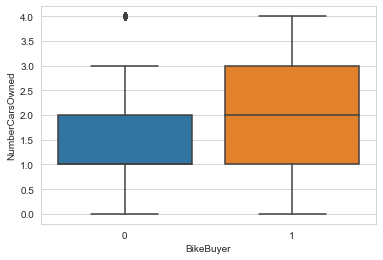

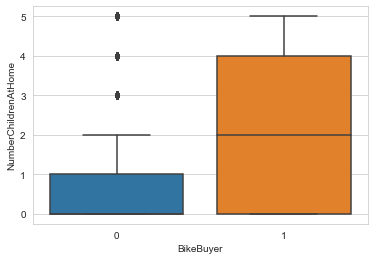

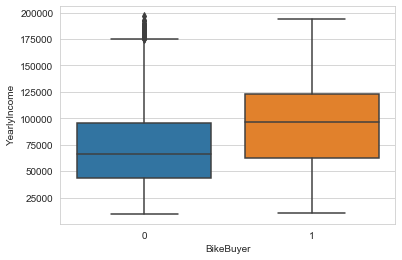

TypeError: invalid type promotion

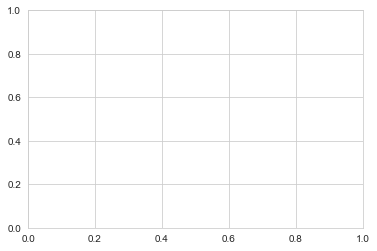

In [42]:
def plot_violin(credit, cols, col_x = 'BikeBuyer'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x,col, data=credit)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

plot_violin(df, num_cols)

CountryRegionName


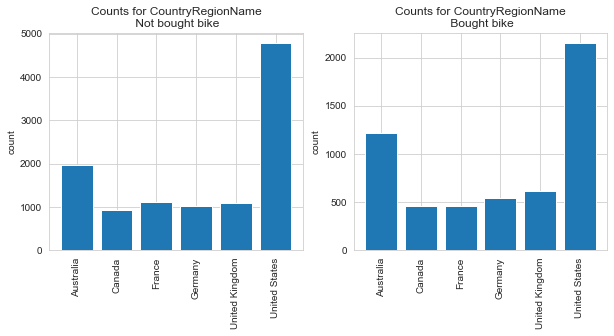

Education


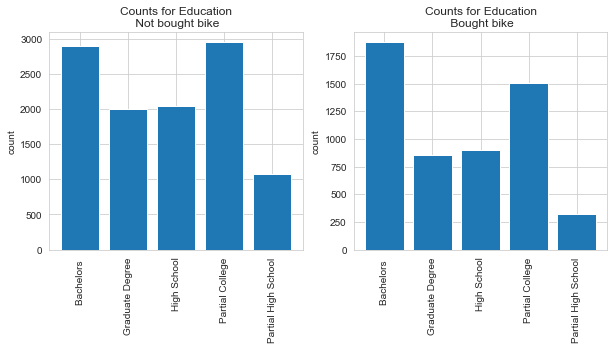

Occupation


In [ ]:
dummydf=df.copy()
dummydf['dummy'] = np.ones(shape = dummydf.shape[0])
for col in cat_cols:
    print(col)
    counts = dummydf[['dummy', 'BikeBuyer', col]].groupby(['BikeBuyer', col], as_index = False).count()
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Not bought bike')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['BikeBuyer'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Bought bike')
    plt.ylabel('count')
    plt.show()